In [2]:
#basic
import numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm_notebook
from sklearn.decomposition import PCA,IncrementalPCA,KernelPCA,FastICA,TruncatedSVD,randomized_svd,NMF
#Pretreatment
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler,QuantileTransformer,RobustScaler,PowerTransformer
from sklearn.feature_selection import VarianceThreshold
#model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm, neighbors, linear_model, neural_network
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import warnings
import lightgbm as lgb
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,...,-0.002670,-0.011401,0.007895,0.000651,-0.002613,0.002351,-0.011684,-0.007153,-0.004066,0.500225
std,1.706660,1.720943,1.698693,1.874875,1.726869,1.734646,1.720431,1.693276,1.872248,1.645070,...,1.799308,1.788832,1.775853,1.703296,1.692972,1.742284,1.698231,1.759408,1.661463,0.500001
min,-15.588429,-15.644144,-15.235982,-15.672966,-16.800626,-14.789422,-15.591329,-15.696478,-17.011807,-14.693510,...,-16.740804,-17.681945,-15.705197,-15.765274,-15.604682,-16.965775,-15.064518,-16.145154,-16.815640,0.000000
25%,-0.765404,-0.770224,-0.777421,-0.802502,-0.770838,-0.771608,-0.770634,-0.764398,-0.795475,-0.756594,...,-0.782944,-0.788437,-0.778580,-0.767367,-0.764199,-0.770457,-0.768885,-0.785702,-0.766552,0.000000
50%,0.002148,0.003543,-0.005771,-0.003505,0.000866,0.002830,0.001257,-0.003657,0.004936,0.004372,...,-0.002239,-0.004543,-0.000675,0.000771,-0.000331,-0.000617,-0.005634,-0.004459,-0.004471,1.000000
75%,0.769228,0.773400,0.764092,0.798460,0.769954,0.776606,0.769794,0.752836,0.800376,0.764807,...,0.786180,0.776178,0.788910,0.769277,0.764115,0.773100,0.753518,0.774197,0.758012,1.000000
max,15.797000,18.577178,17.205310,16.585173,16.815798,17.378922,15.202100,16.645394,19.396192,17.131375,...,15.511936,16.252503,16.387990,16.260286,14.748128,16.212146,18.866005,18.811832,17.302211,1.000000


In [19]:
train['wheezy-copper-turtle-magic'].head(10)

0     99
1     52
2    230
3     78
4    497
5    131
6     50
7    141
8    300
9     85
Name: wheezy-copper-turtle-magic, dtype: int64

In [15]:
train.columns

Index(['id', 'muggy-smalt-axolotl-pembus', 'dorky-peach-sheepdog-ordinal',
       'slimy-seashell-cassowary-goose',
       'snazzy-harlequin-chicken-distraction', 'frumpy-smalt-mau-ordinal',
       'stealthy-beige-pinscher-golden', 'chummy-cream-tarantula-entropy',
       'hazy-emerald-cuttlefish-unsorted', 'nerdy-indigo-wolfhound-sorted',
       ...
       'wheezy-myrtle-mandrill-entropy', 'wiggy-lilac-lemming-sorted',
       'gloppy-cerise-snail-contributor', 'woozy-silver-havanese-gaussian',
       'jumpy-thistle-discus-sorted', 'muggy-turquoise-donkey-important',
       'blurry-buff-hyena-entropy', 'bluesy-chocolate-kudu-fepid',
       'gamy-white-monster-expert', 'target'],
      dtype='object', length=258)

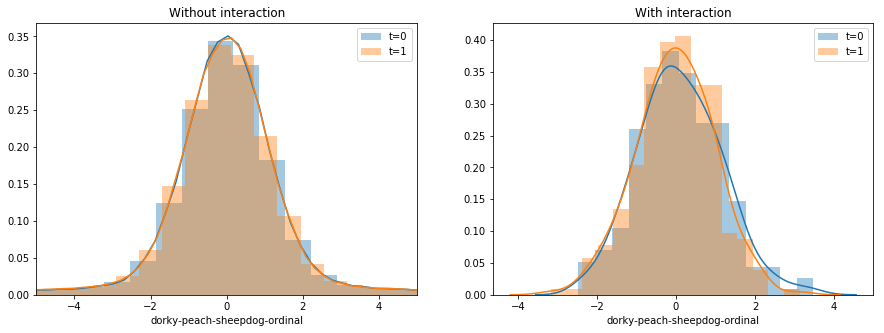

In [16]:
plt.figure(figsize=(15,5))

# 전체row, 'dorky-peach-sheepdog-ordinal변수에 대한 distplot
plt.subplot(1,2,1)
sns.distplot(train[ (train['target']==0) ]['dorky-peach-sheepdog-ordinal'], label = 't=0')
sns.distplot(train[ (train['target']==1) ]['dorky-peach-sheepdog-ordinal'], label = 't=1')
plt.title("Without interaction")
plt.xlim((-5,5))
plt.legend()

# wheezy-copper-turtle-magic=0, dorky-peach-sheepdog-ordinal변수에 대한 distplot
plt.subplot(1,2,2)
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==0) ]
             ['dorky-peach-sheepdog-ordinal'], label = 't=0')
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==1) ]
             ['dorky-peach-sheepdog-ordinal'], label = 't=1')
plt.title("With interaction")
plt.legend()

plt.show()

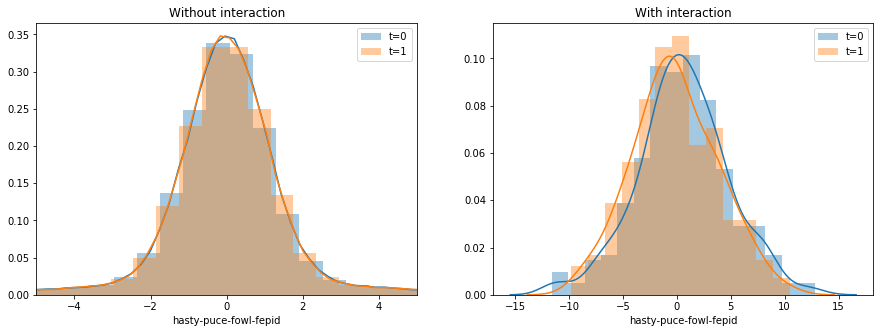

In [17]:
plt.figure(figsize=(15,5))

# 전체row, 'hasty-puce-fowl-fepid'변수에 대한 distplot
plt.subplot(1,2,1)
sns.distplot(train[ (train['target']==0) ]['hasty-puce-fowl-fepid'], label = 't=0')
sns.distplot(train[ (train['target']==1) ]['hasty-puce-fowl-fepid'], label = 't=1')
plt.title("Without interaction")
plt.xlim((-5,5))
plt.legend()

# wheezy-copper-turtle-magic=0, hasty-puce-fowl-fepid'변수에 대한 distplot
plt.subplot(1,2,2)
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==0) ]
             ['hasty-puce-fowl-fepid'], label = 't=0')
sns.distplot(train[ (train['wheezy-copper-turtle-magic']==0) & (train['target']==1) ]
             ['hasty-puce-fowl-fepid'], label = 't=1')
plt.title("With interaction")
plt.legend()

plt.show()